<a href="https://colab.research.google.com/github/JSJeong-me/GPT-Web/blob/main/112-Deep_Learning_Vector_Similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Embedding Images

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from PIL import Image
import numpy as np

In [ ]:
model_url = "https://tfhub.dev/tensorflow/efficientnet/lite0/feature-vector/2"

IMAGE_SHAPE = (224, 224)

layer = hub.KerasLayer(model_url)
model = tf.keras.Sequential([layer])

In [ ]:
def extract(file):
  file = Image.open(file).convert('L').resize(IMAGE_SHAPE)
  display(file)

  file = np.stack((file,)*3, axis=-1)

  file = np.array(file)/255.0

  embedding = model.predict(file[np.newaxis, ...])
  #print(embedding)
  vgg16_feature_np = np.array(embedding)
  flattended_feature = vgg16_feature_np.flatten()

  #print(len(flattended_feature))
  #print(flattended_feature)
  #print('-----------')
  return flattended_feature

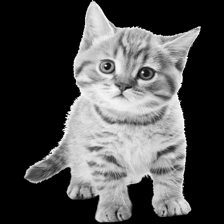

1/1 [==============================] - 2s 2s/step


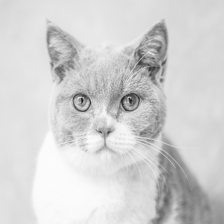

1/1 [==============================] - 0s 100ms/step


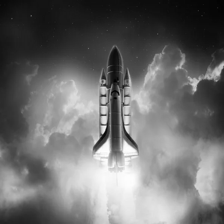

1/1 [==============================] - 0s 88ms/step


In [ ]:
cat1 = extract('./cat1.png')
cat2 = extract('./cat2.jpg')
rocket = extract('./rocket.jpg')

# Distances Images

In [ ]:
from scipy.spatial import distance

In [ ]:
metric = 'cosine'

In [ ]:
dc = distance.cdist([cat1], [cat1], metric)[0]
print(dc)
print("the distance between cat1 and the cat1 is {}".format(dc))

[0.]
the distance between cat1 and the cat1 is [0.]


In [ ]:
dc = distance.cdist([cat1], [cat2], metric)[0]
print(dc)
print("the distance between cat1 and the cat2 is {}".format(dc))

[0.37517998]
the distance between cat1 and the cat2 is [0.37517998]


In [ ]:
dc = distance.cdist([cat1], [rocket], metric)[0]
print(dc)
print("the distance between cat1 and the rocket is {}".format(dc))

[0.84023548]
the distance between cat1 and the rocket is [0.84023548]


In [ ]:
dc = distance.cdist([cat2], [rocket], metric)[0]
print(dc)
print("the distance cat2 original and the rocket is {}".format(dc))

[0.81781548]
the distance cat2 original and the rocket is [0.81781548]
